In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Linear Regression Data.xlsx")

In [3]:
df

,Marketing Budget (X) in Thousands,Actual Sales(Y) in Millions
0,127.4,10.5
1,364.4,21.4
2,150.0,10.0
3,128.7,9.6
4,285.9,17.4
5,200.0,12.5
6,303.3,20.0
7,315.7,21.0
8,169.8,14.7
9,104.9,10.1


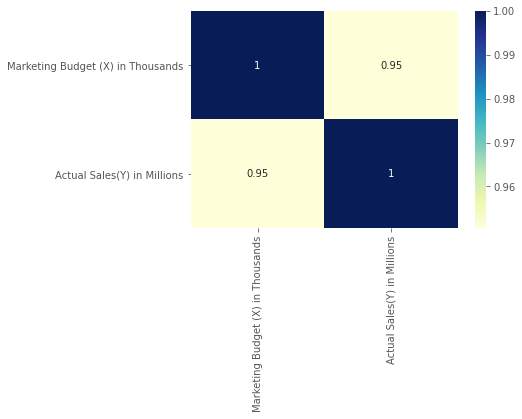

In [4]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

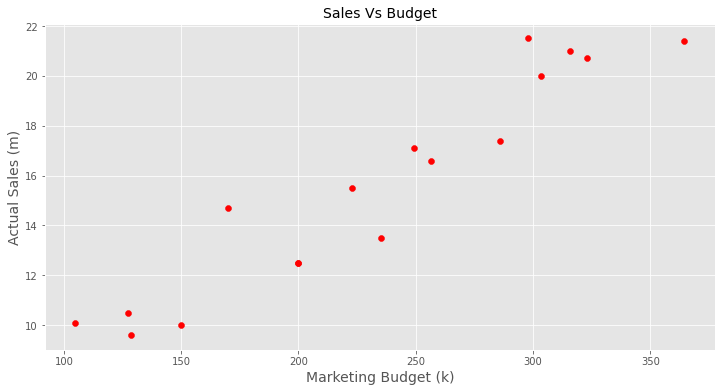

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(df['Marketing Budget (X) in Thousands'], df['Actual Sales(Y) in Millions'], color='red')
plt.title('Sales Vs Budget', fontsize=14)
plt.xlabel('Marketing Budget (k)', fontsize=14)
plt.ylabel('Actual Sales (m)', fontsize=14)
plt.grid(True)
plt.show()

In [6]:
n_df = df.drop('Actual Sales(Y) in Millions',axis='columns')
n_df

,Marketing Budget (X) in Thousands
0,127.4
1,364.4
2,150.0
3,128.7
4,285.9
5,200.0
6,303.3
7,315.7
8,169.8
9,104.9


In [7]:
sales = df['Actual Sales(Y) in Millions']
sales

0     10.5
1     21.4
2     10.0
3      9.6
4     17.4
5     12.5
6     20.0
7     21.0
8     14.7
9     10.1
10    21.5
11    16.6
12    17.1
13    20.7
14    15.5
15    13.5
16    12.5
Name: Actual Sales(Y) in Millions, dtype: float64

In [8]:
# Create linear regression object
lr = linear_model.LinearRegression()
lr.fit(n_df,sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#let's predict Sales for a given budget amount
lr.predict([[150]])

array([11.26758759])

In [10]:
#let's generate model prediction for all budget amounts in our dataset
y_predict = lr.predict(n_df)

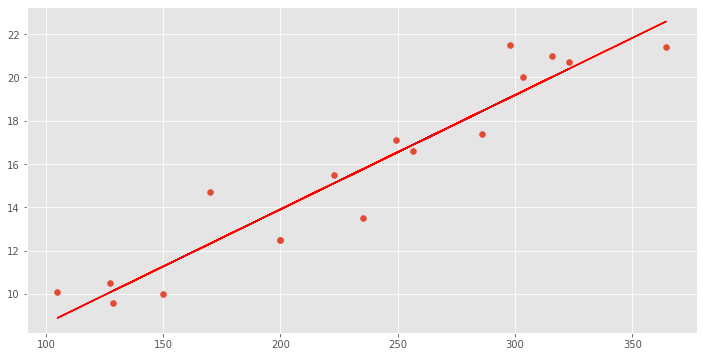

In [11]:
# Visualize the predicted amount as a line on the test set
#The scatter-plot with best-fit line looks like
plt.figure(figsize=(12,6))
plt.scatter(df['Marketing Budget (X) in Thousands'], df['Actual Sales(Y) in Millions'])
plt.plot(df['Marketing Budget (X) in Thousands'], y_predict, 'r')
plt.show()

In [12]:
#Generate a file with list of sales predictions
# Intercept value
print("Intercept :",lr.intercept_)

# Slope value
print('Slope :',lr.coef_)

Intercept : 3.3524968264935975
Slope : [0.05276727]


### Y= mx + b
#### m = 0.05276727
#### b = 3.3524968264935975
#### x = Marketing Budget (X) in Thousands

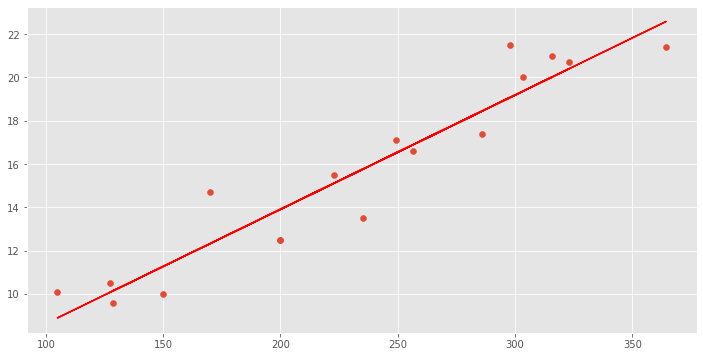

In [13]:
# Manually plotting the line with above Intercept and Slope
plt.figure(figsize=(12,6))
plt.scatter(df['Marketing Budget (X) in Thousands'], df['Actual Sales(Y) in Millions'])
plt.plot(df['Marketing Budget (X) in Thousands'],  0.05276727*df['Marketing Budget (X) in Thousands'] + 3.3524968264935975, 'r')
plt.show()

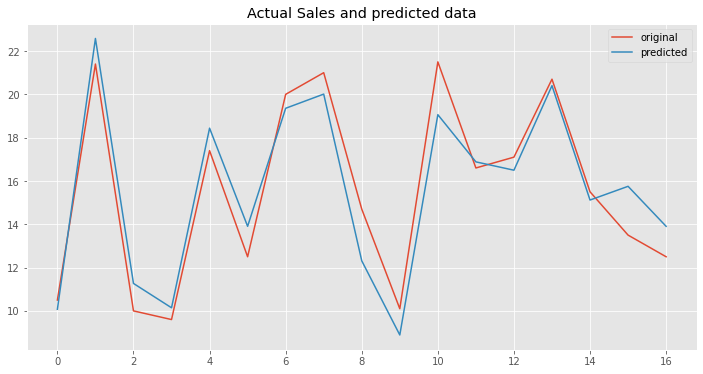

In [14]:
plt.figure(figsize=(12,6))
x_ax = range(len(df['Actual Sales(Y) in Millions']))
plt.plot(x_ax, df['Actual Sales(Y) in Millions'], label="original")
plt.plot(x_ax,y_predict, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()

In [15]:
#proposed budget
from pandas import DataFrame
Stock_Market = {'Marketing Budget': [201,207,225,225,270,275,292,299,310,323,] }
b_df = DataFrame(Stock_Market,columns=['Marketing Budget']) 
b_df

,Marketing Budget
0,201
1,207
2,225
3,225
4,270
5,275
6,292
7,299
8,310
9,323


In [16]:
#Predict Sales for the forecasted budget amount
ps = lr.predict(b_df)
ps

array([13.95871845, 14.27532208, 15.22513297, 15.22513297, 17.5996602 ,
       17.86349656, 18.76054018, 19.12991108, 19.71035107, 20.3963256 ])

In [17]:
b_df['Forecasted Sales'] = ps
b_df

,Marketing Budget,Forecasted Sales
0,201,13.958718
1,207,14.275322
2,225,15.225133
3,225,15.225133
4,270,17.599660
5,275,17.863497
6,292,18.760540
7,299,19.129911
8,310,19.710351
9,323,20.396326


In [18]:
b_df.to_csv("Forecasted_Sales.csv")